In [1]:
import torch
import time
from snn_delays.snn import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils import get_device, print_spike_info, propagate_batch, set_seed
from snn_delays.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset, DataLoader
from collections import OrderedDict
device = get_device()

# for reproducibility
set_seed(42)


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
dataset = 'shd'
total_time = 50
batch_size = 20

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

#### get the indexes for class 0,1, ... 19

train_dataset = DL._dataset.test_dataset
num_classes = DL._dataset.n_classes

class_indices = {}
for idx, (_, label) in enumerate(train_dataset):
    label = np.argmax(label)
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)
    if len(class_indices) == num_classes:
        break
class_indices = dict(sorted(class_indices.items()))
sampled_indices = [np.random.choice(indices) for indices in class_indices.values()]

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
total spikes: 104600.0
spikes per sample: 5230.0
spikes per timestep: 104.6
spikes per neuron: 7.4714285714285715
[0, 1, 2, 3, 4]


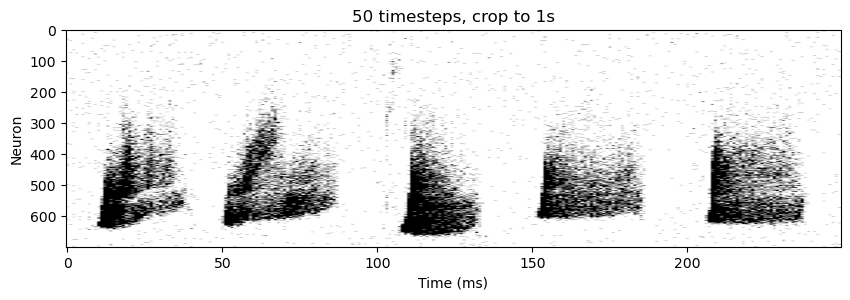

In [3]:
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn)
plt.figure(figsize=(10,17))
plt.title("50 timesteps, crop to 1s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.1)

[CropTime(min=0, max=500000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
total spikes: 113745.0
spikes per sample: 5687.25
spikes per timestep: 113.745
spikes per neuron: 8.124642857142858
[0, 1, 2, 3, 4]


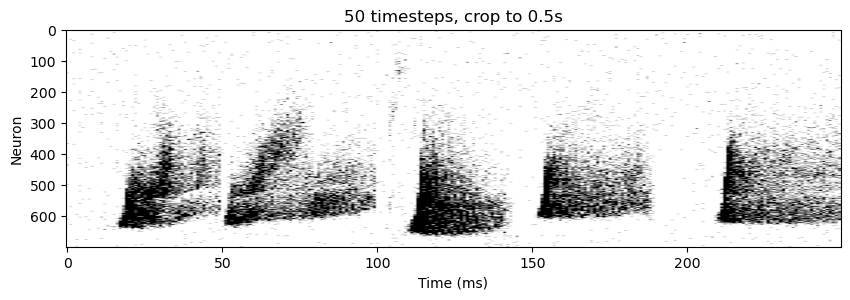

In [4]:
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=5e5)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn)
plt.figure(figsize=(10,17))
plt.title("50 timesteps, crop to 0.5s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.1)

[ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
total spikes: 104600.0
spikes per sample: 5230.0
spikes per timestep: 104.6
spikes per neuron: 7.4714285714285715
[0, 1, 2, 3, 4]


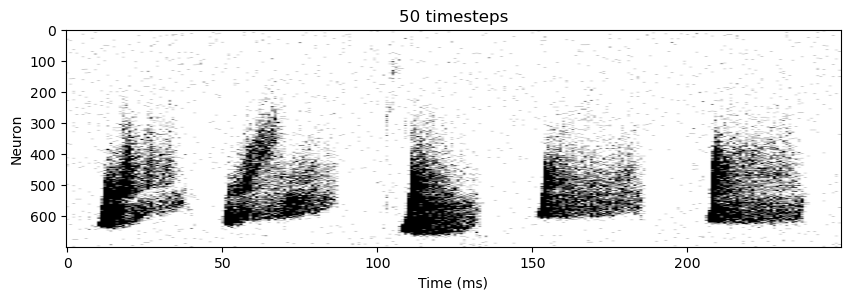

In [5]:
dataset = 'shd'
total_time = 50

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)
_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn)
plt.figure(figsize=(10,17))
plt.title("50 timesteps")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.1)

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=250, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
total spikes: 154035.0
spikes per sample: 7701.75
spikes per timestep: 30.807
spikes per neuron: 11.0025
[0, 1, 2, 3, 4]


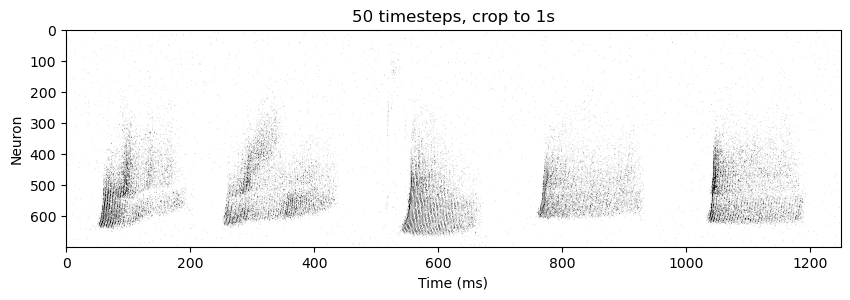

In [8]:
total_time = 250
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn)
plt.figure(figsize=(10,17))
plt.title("50 timesteps, crop to 1s")
plot_raster(snn, 'input', 5)
plt.gca().set_aspect(0.5)
plt.show()